# 1) Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# 2)Hypothesis


#   **- Product Features**
Each product has diffrent set of features such as NutritionFactors,Weight,Product Category, Visibility of Product 

Let's generate a few hypotheses based on the features of the product :

-Product Category and it's weight might influnce sales as if two products fall under same category and one having higher weight that the other or less according to the Customer prefrence Sales of product will be determined.

-Most Customers look on NutritionFactors of product and then decide whether to purchase it or not so NutritionFactors can play a role in predicting sales.

-If the product is not Visible to the consumer then the probability of Customer to buy the product decreases so does the sales.

#   **- Store Features**
Each store has certain features like location,StoreType,Size which could play an important role in Sales Prediction :
-Size of Store as bigger stores have more products avaliable which could target wider customer base affecting Sales in the end.

-Location would play a role influncing sales .

-Type of store.

#  **- Production Company Features**
-The more famous Company's name attracting larger customer which influnces sales.

-Retail price plays a role affecting sales as more affordable with high quality the product is the more sales it will generate.





# Loading Packages and Data

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [314]:
df = pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [180]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [298]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [181]:
df.shape

(8523, 12)

In [299]:
test_df.shape

(5681, 11)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




*   We can conclude that we have more than one categorical feature wich will be handeld using encoding through further analysis.
*   There is null values in Item_Weight and Outlet_Size 



In [4]:
missing_values=df.isna().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


# Columns Statistics

In [214]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [300]:
test_df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


I have noticed that most null values at Outlet_Size occur at Grocery store and also Supermarket type 1 .

# Let's Check

In [89]:
df[(df['Outlet_Size'].isna())&((df['Outlet_Type']=='Grocery Store') |(df['Outlet_Type']=='Supermarket Type1'))]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Our assumption is true since size is a categorical feature i will impute it using mode.

In [4]:
mode_grocerystore=df[df['Outlet_Type']=='Grocery Store']['Outlet_Size'].mode()
print(mode_grocerystore)

0    Small
Name: Outlet_Size, dtype: object


In [6]:
mode_supermarkert1=df[df['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].mode()
print(mode_supermarkert1)

0    Small
Name: Outlet_Size, dtype: object


Both Outlets has same mode value at size column which is Small.

In [315]:
df["Outlet_Size"].fillna("Small",inplace=True)

We can impute item's weight with mean or median depending on outliers existence so , Let's Check

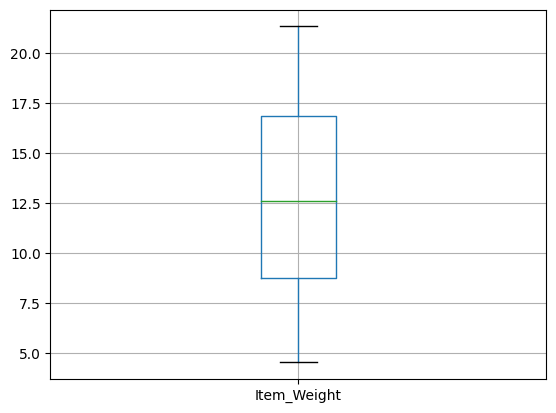

In [184]:
df.boxplot(column='Item_Weight')
plt.show()

There is no outliers so i will use the mean.

In [316]:
df["Item_Weight"].fillna(df['Item_Weight'].mean(),inplace=True)

In [304]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

There are some typos let's fix them.

In [317]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace= True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace= True)
df['Item_Fat_Content'].replace('reg','Regular',inplace= True)


In [306]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Great!! Now let's take a look on their distribution

In [48]:
import plotly.express as ex
ex.pie(df,names='Item_Fat_Content',title='Item_Fat_Content Distribution',hole=0.20)

Low fat products are more than the low fat products.

Let's check Item_type distribution.

In [47]:
import plotly.express as ex
ex.pie(df,names='Item_Type',title='Item_Type Distribution',hole=0.20)

Fruits and vegtebals are most accuring product.

# Categorical Features with target variable.

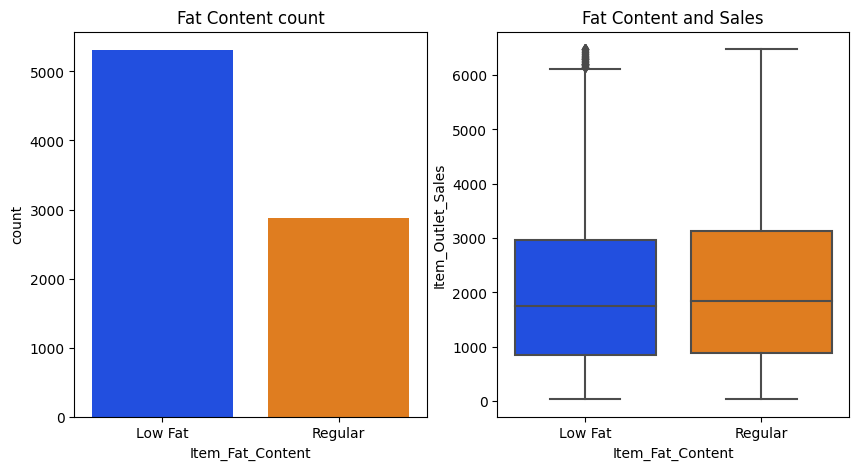

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Fat Content count')
sns.countplot(x=df['Item_Fat_Content'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Fat Content and Sales')
sns.boxplot(x=df.Item_Fat_Content, y=df.Item_Outlet_Sales, palette=("bright"))

plt.show()

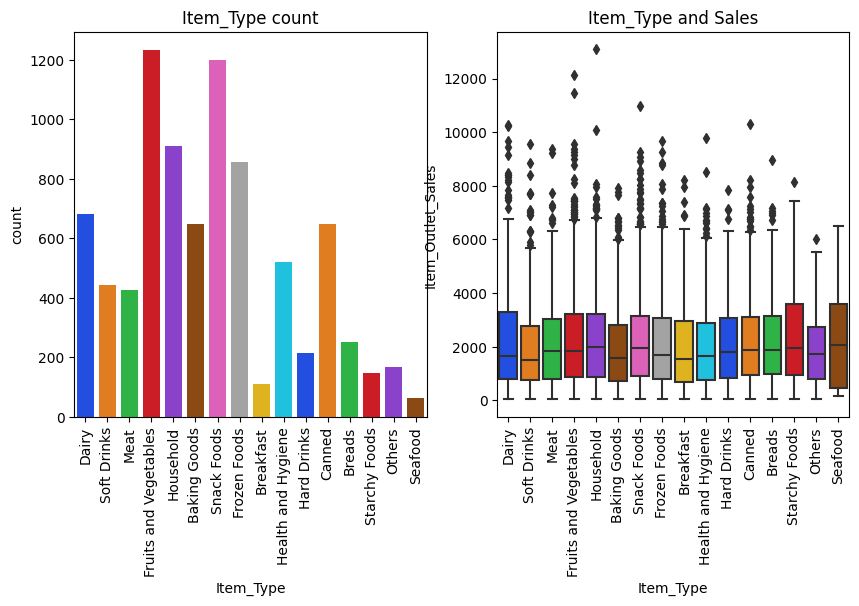

In [307]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title('Item_Type count')
sns.countplot(x=df['Item_Type'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Item_Type and Sales')
plt.xticks(rotation=90)
sns.boxplot(x=df.Item_Type, y=df.Item_Outlet_Sales, palette=("bright"))

plt.show()



*   Sales of each item_type is close .




Instead of looking at each Item_identifier i will create a new feature called product category.

In [318]:
df['Item_Category'] = df['Item_Identifier'].astype(str).str[:2]
df['Item_Category'] = df['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

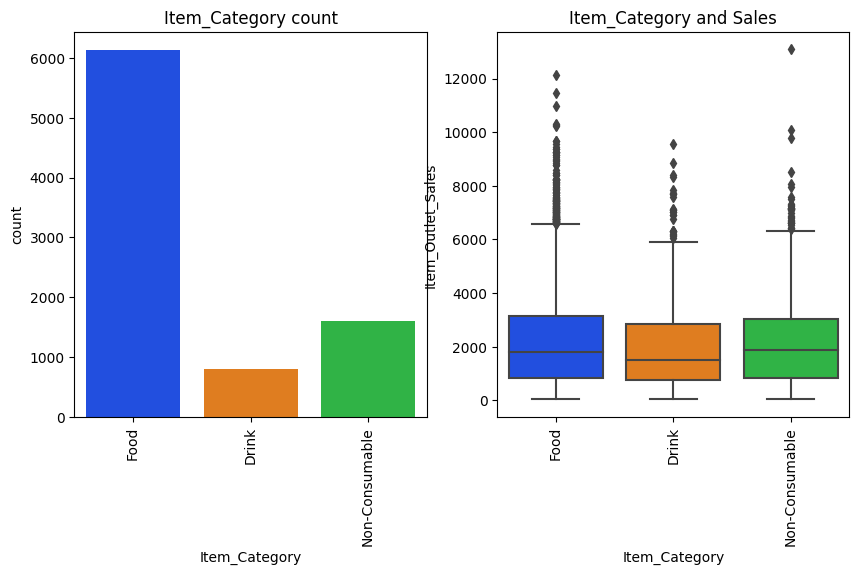

In [310]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title('Item_Category count')
sns.countplot(x=df['Item_Category'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Item_Category and Sales')
plt.xticks(rotation=90)
sns.boxplot(x=df.Item_Category, y=df.Item_Outlet_Sales, palette=("bright"))

plt.show()




*  Food is most accuring item_category and having highest sales amount.
*  Sales amount of 3 categories is close.



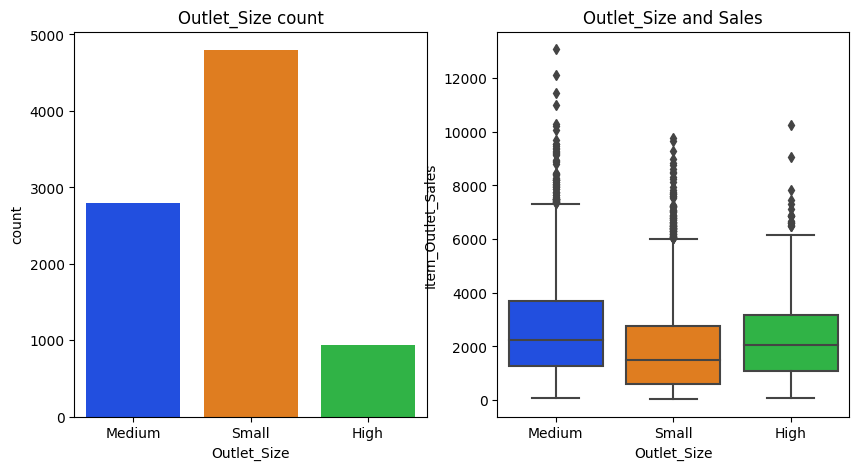

In [311]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#plt.xticks(rotation=90)
plt.title('Outlet_Size count')
sns.countplot(x=df['Outlet_Size'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Outlet_Size and Sales')
#plt.xticks(rotation=90)
sns.boxplot(x=df.Outlet_Size, y=df.Item_Outlet_Sales, palette=("bright"))

plt.show()




*   Most Outlet size is Meduim and their sales are the highest.



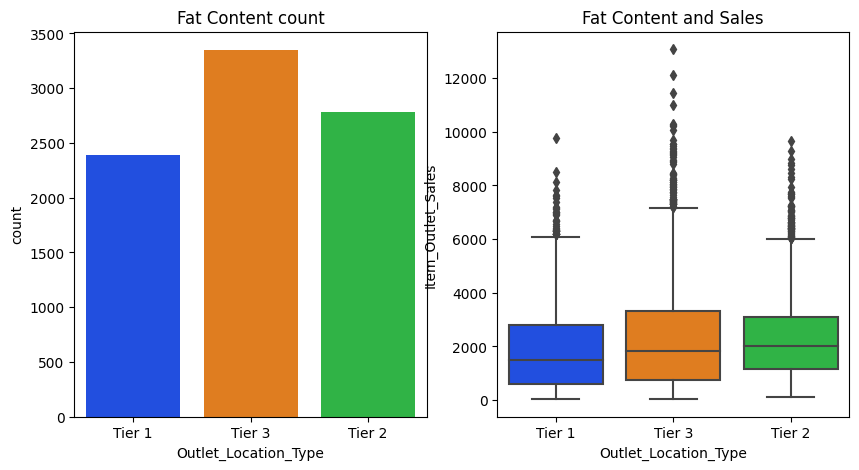

In [66]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#plt.xticks(rotation=90)
plt.title('Fat Content count')
sns.countplot(x=df['Outlet_Location_Type'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Fat Content and Sales')
#plt.xticks(rotation=90)
sns.boxplot(x=df.Outlet_Location_Type, y=df.Item_Outlet_Sales, palette=("bright"))

plt.show()



*   Most outlets are in tier 3 having more sales amount than locations but although outlets at tier 1  are less than tier 3 but their sales are close which makes sense as tier 1 tends to have more developed cities .




<Axes: title={'center': 'Outlet_Type and Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

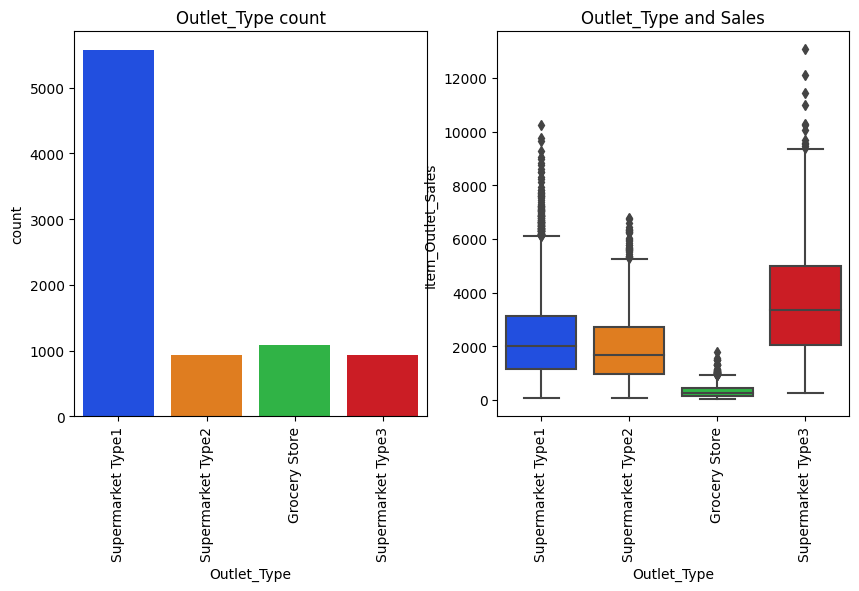

In [312]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Outlet_Type count")
plt.xticks(rotation=90)
sns.countplot(x=df["Outlet_Type"], palette=("bright"))


plt.subplot(1,2,2)
plt.title("Outlet_Type and Sales")
plt.xticks(rotation=90)
sns.boxplot(x=df["Outlet_Type"],y=df["Item_Outlet_Sales"],palette=("bright"))





*   Most Outlets are Super market type 1 .
*   Supermarket type 3 is having highest sales .



<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

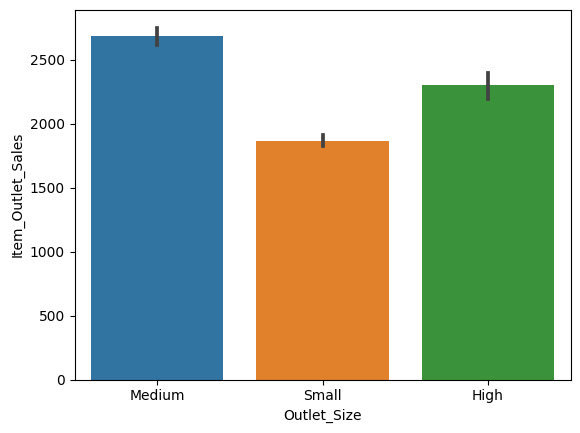

In [52]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

# Outliers

<Axes: >

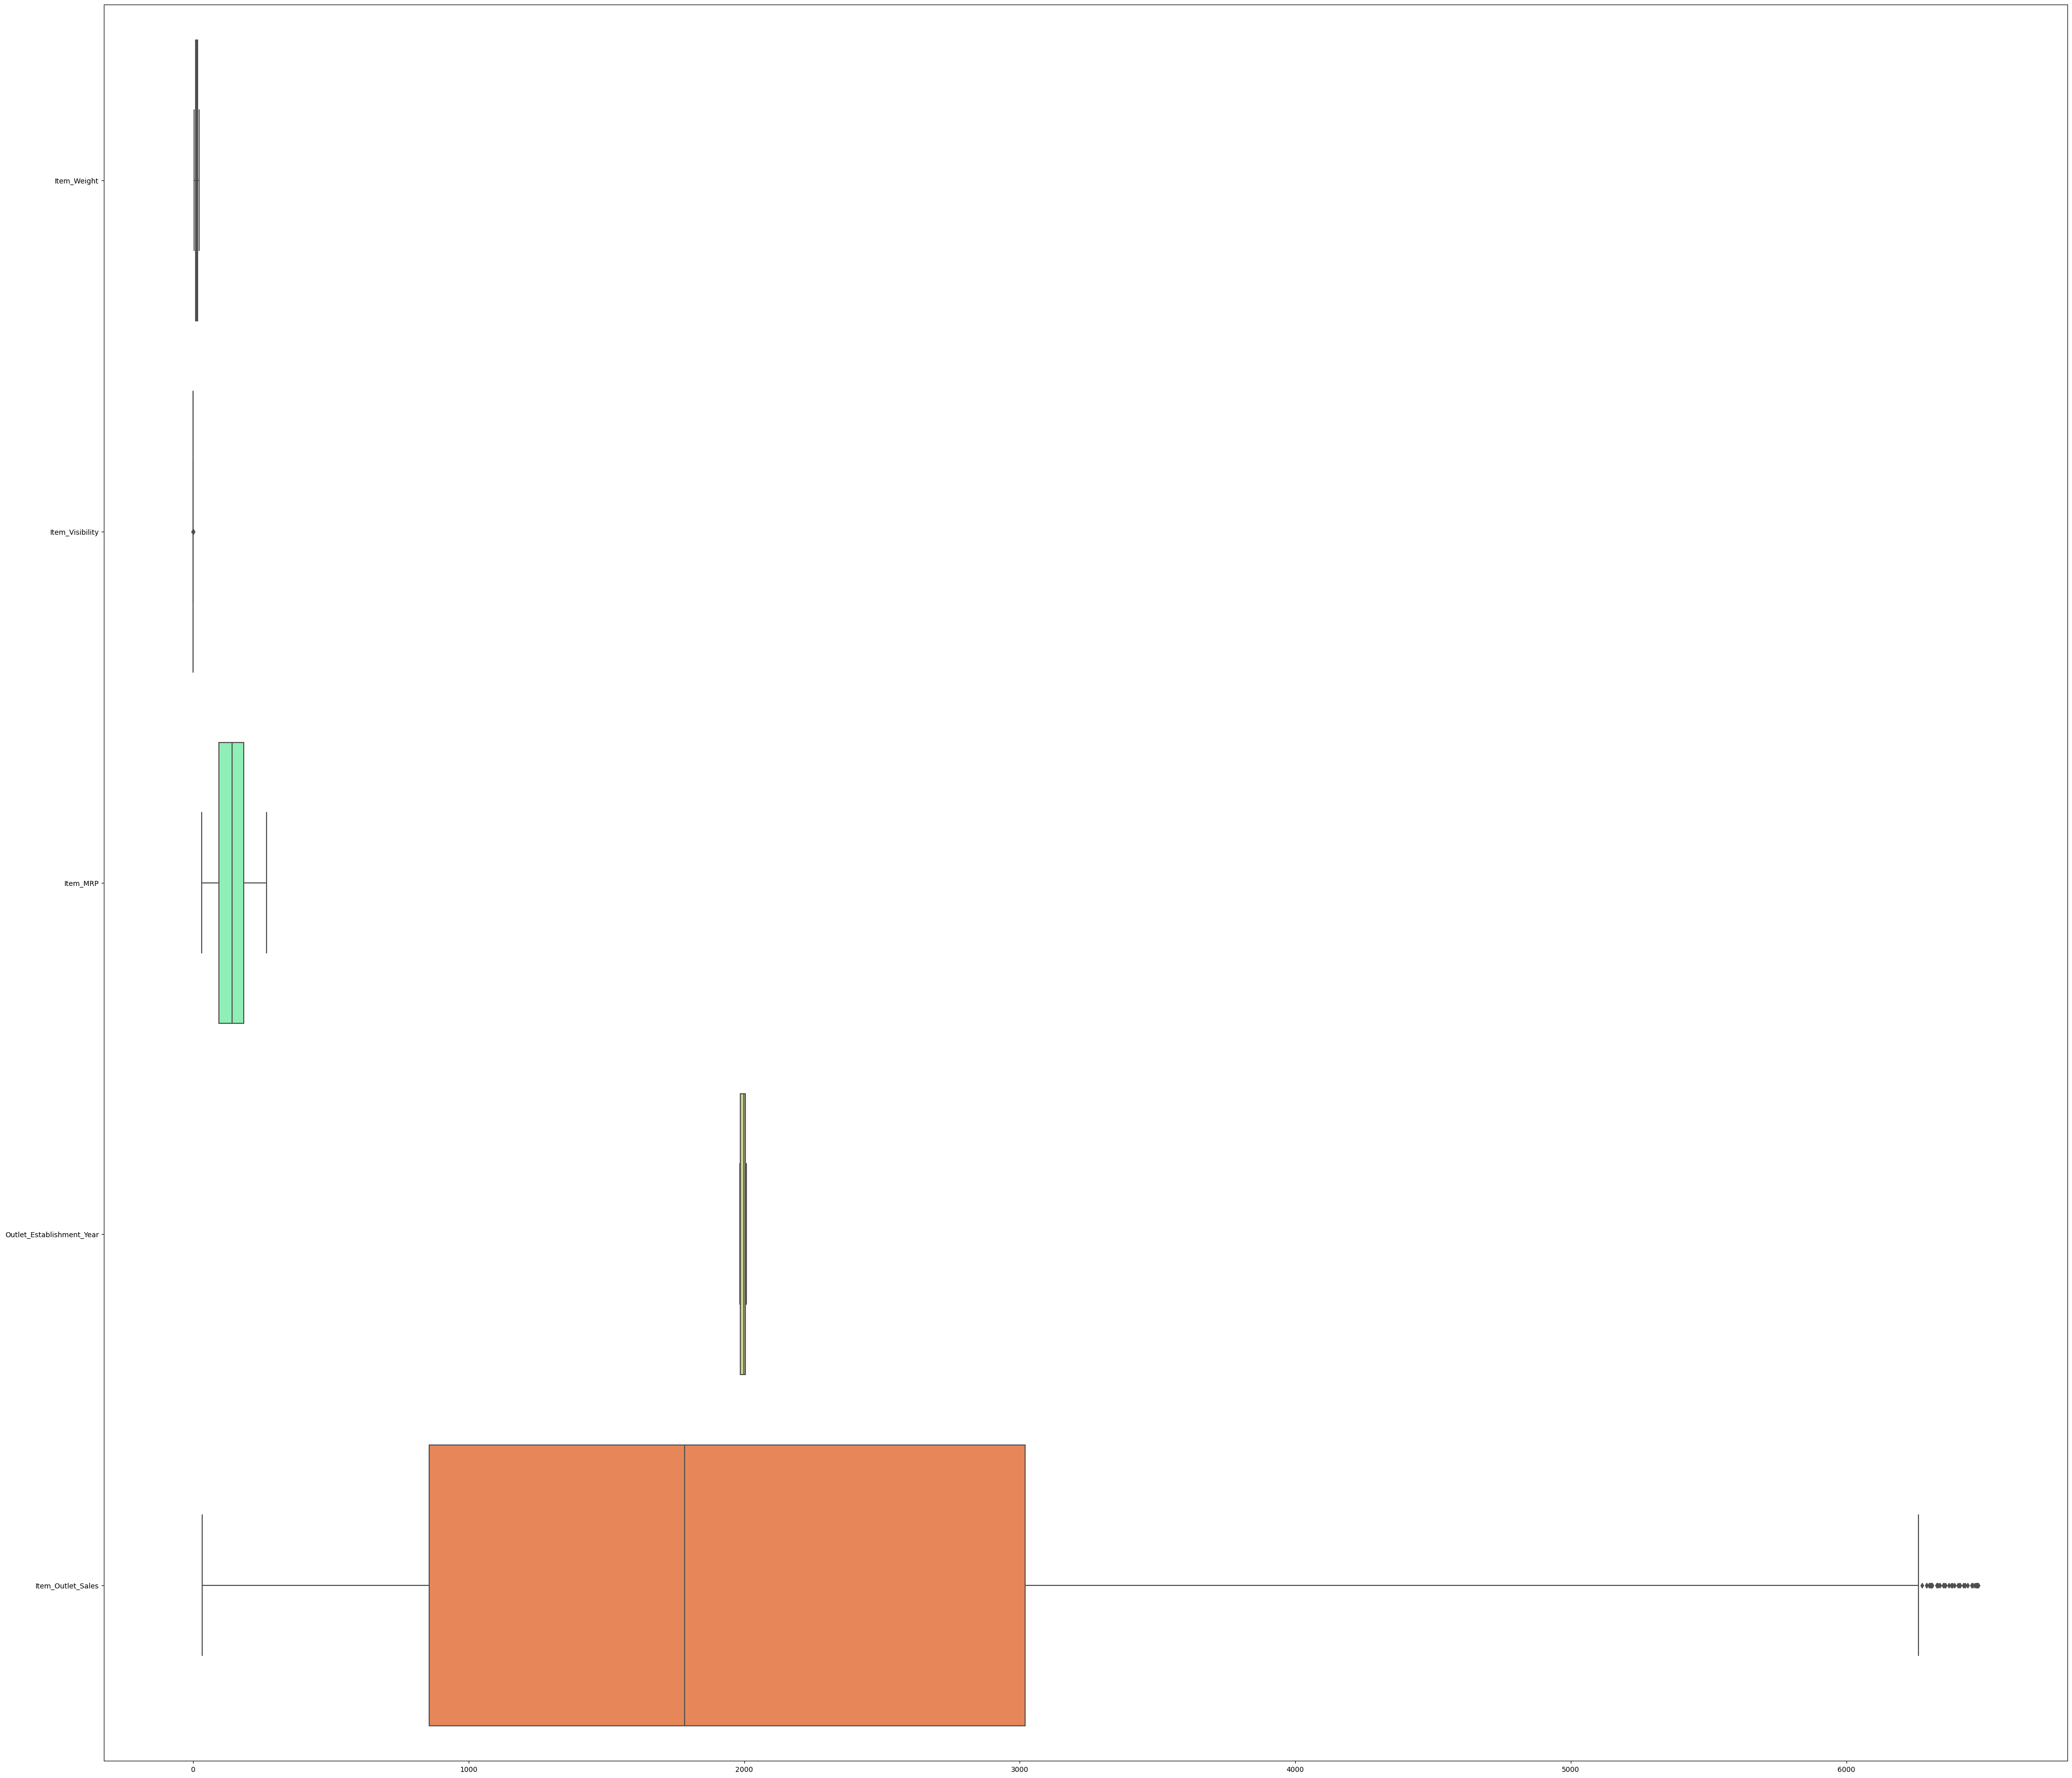

In [97]:
plt.figure(figsize= (50,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

In [319]:
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    df[col] =np.where(df[col].values>upper,upper,df[col].values)
    df[col] =np.where(df[col].values<lower,lower,df[col].values)
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in Item_Weight: 0
Number of outliers in Item_Visibility: 144
Number of outliers in Item_MRP: 0
Number of outliers in Outlet_Establishment_Year: 0
Number of outliers in Item_Outlet_Sales: 186


Item_Outlet_Sales after outliers handling

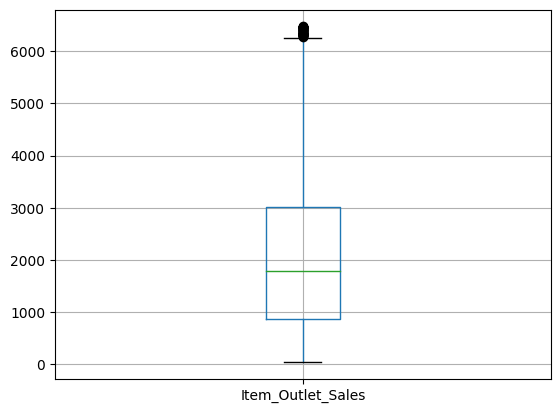

In [249]:
df.boxplot(column='Item_Outlet_Sales')
plt.show()

# Numerical Features

<Axes: >

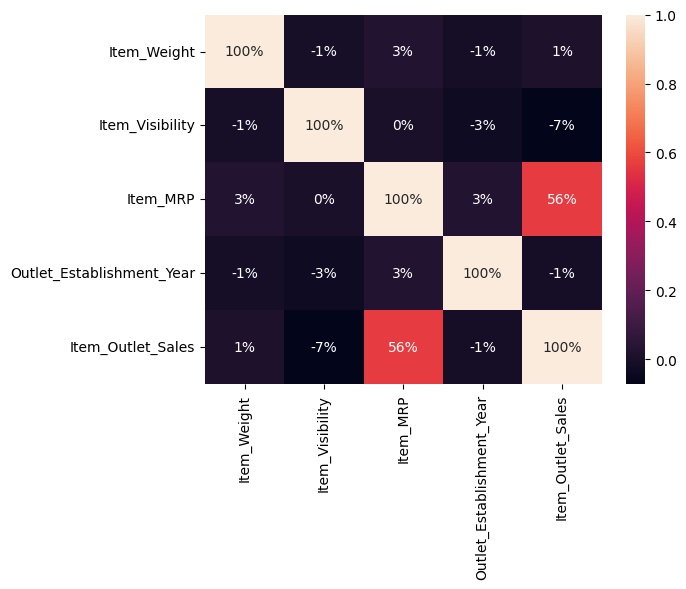

In [188]:
# Heatmap
sns.heatmap(df.corr(), annot=True,fmt='.0%')

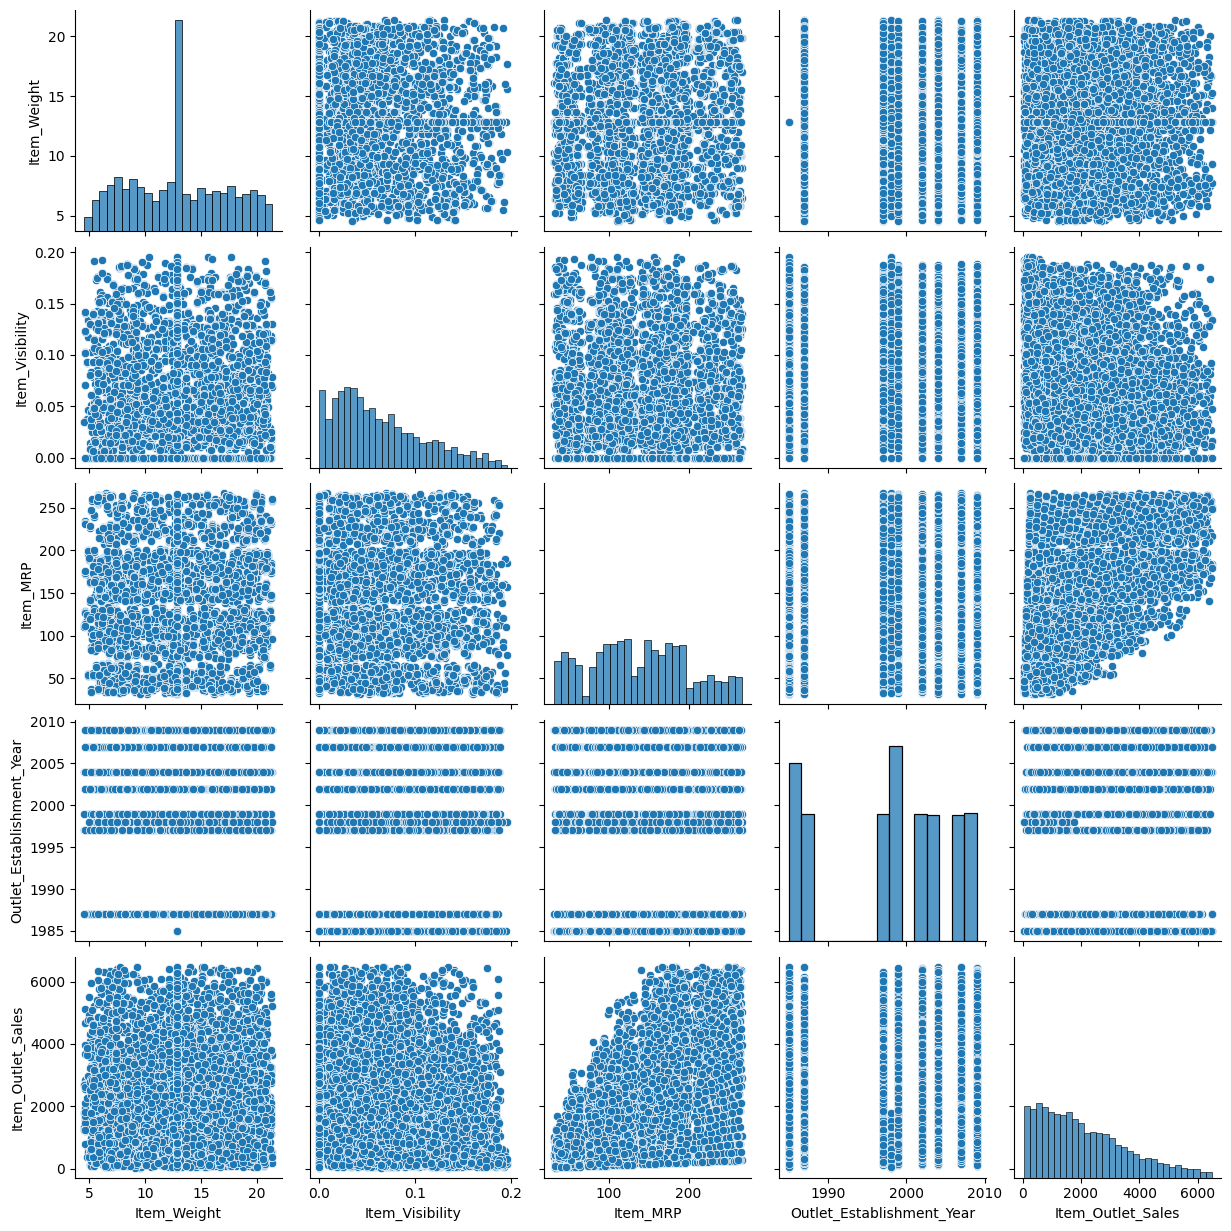

In [189]:
sns.pairplot(df)



*   We can't conclude a clear direct releation between features and target but ,it seems that item_mrp is the only feature which have a direct releation with target feature.



# Let's check Distribution

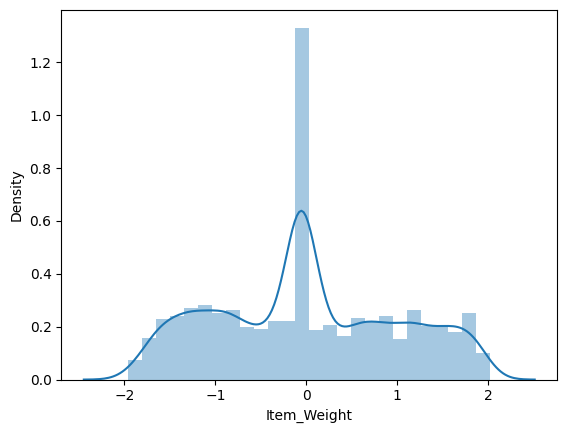

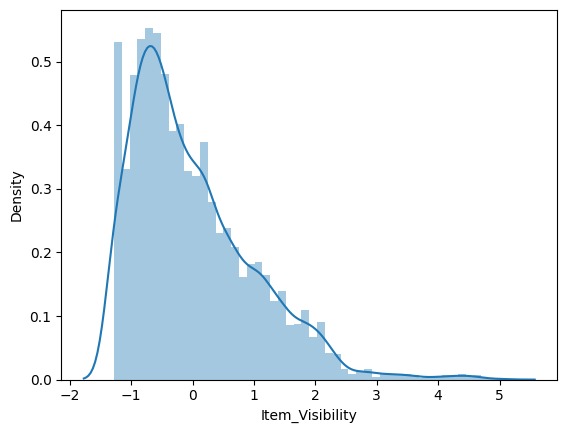

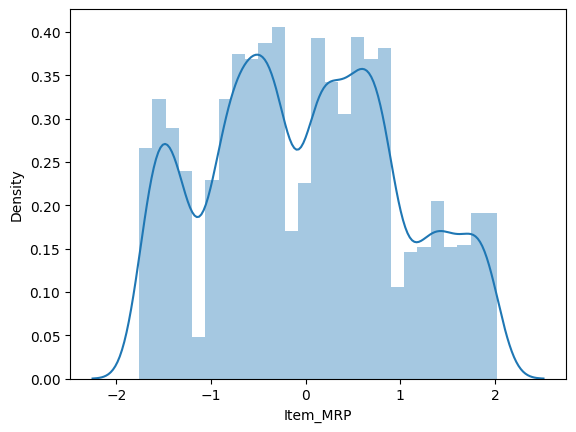

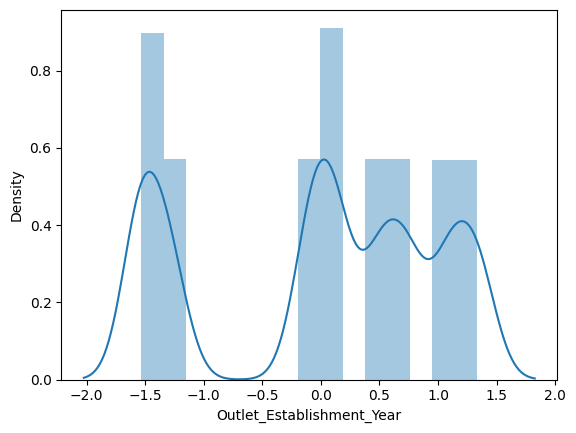

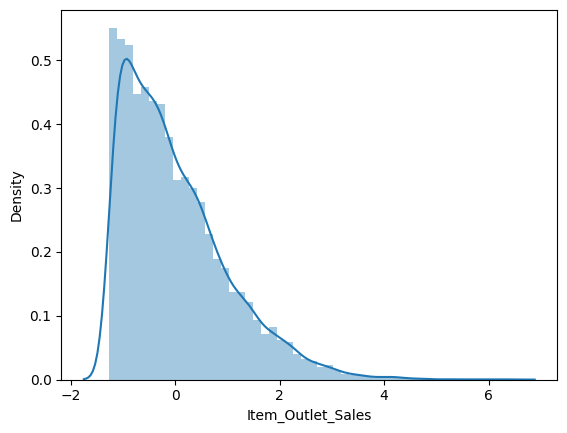

In [66]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for col in num_cols:
    sns.distplot(df[col], kde = True)
    plt.show()

Some columns are skewed as sales and visibility.

In [324]:
# Using Square Root Transformation to treat skweness
columns = ['Item_Visibility','Item_Outlet_Sales']
for col in columns:
  df[col]=np.sqrt(df[col])


let's take a look after transformation.

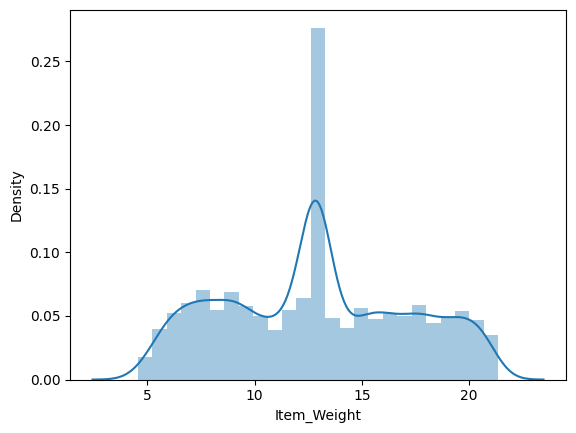

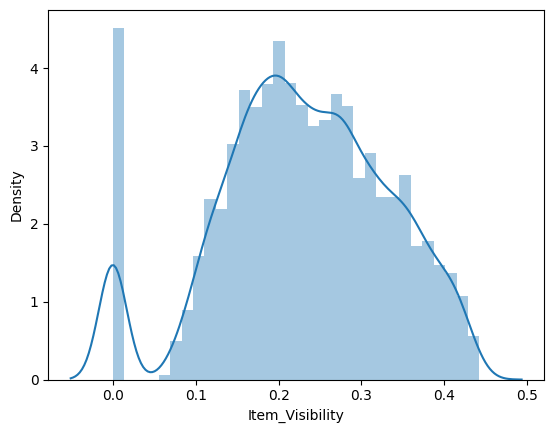

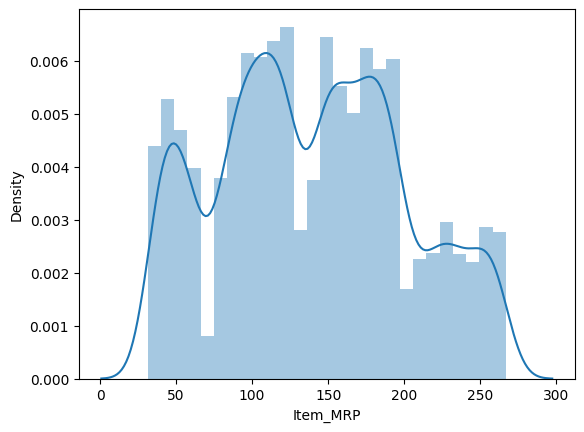

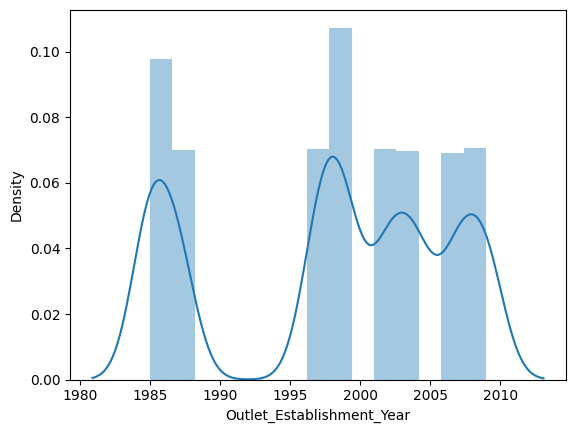

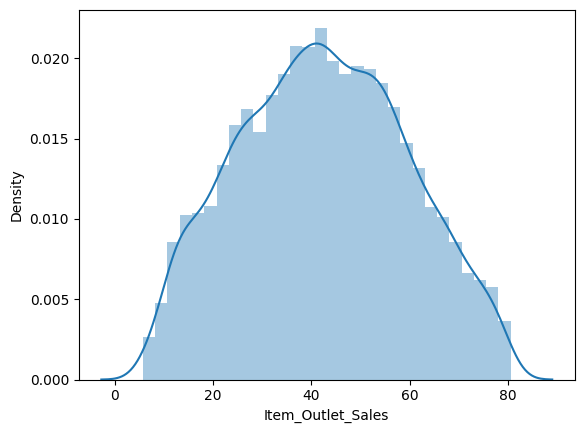

In [325]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for col in num_cols:
    sns.distplot(df[col], kde = True)
    plt.show()

# Encoding

i will use dummies encoding for item_type and outlet_type

In [320]:
#encoding
def dummies(x,df):
    a = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, a], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [321]:
df = dummies('Item_Type',df)
#df = dummies('Outlet_Identifier',df)
df = dummies('Outlet_Type',df)
df=dummies('Item_Category',df)


Label encoding for other categorical features.

In [322]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

  
df['Item_Fat_Content'].unique()

array([0, 1])

In [323]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999.0,1,0,3735.1380,...,0,0,0,0,0,1,0,0,1,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009.0,1,2,443.4228,...,0,0,0,1,0,0,1,0,0,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999.0,1,0,2097.2700,...,0,0,0,0,0,1,0,0,1,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998.0,2,2,732.3800,...,0,0,0,0,0,0,0,0,1,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987.0,0,2,994.7052,...,0,0,0,0,0,1,0,0,0,1


Split into X and y 

In [327]:
X=df.drop(['Outlet_Identifier','Item_Identifier','Item_Outlet_Sales'],axis=1)
#X=df.drop(columns='Item_Visibility',axis=1)
Y=df['Item_Outlet_Sales']

In [328]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state = 42)



Scale data using robustScaler

In [329]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
trans = RobustScaler()
X_train_transformed = trans.fit_transform(x_train)
X_test_transformed=trans.transform(x_test)


# Linear Regression model

In [330]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)
y_pred = regressor.predict(X_test_transformed)
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 108.75235679903783
MAE: 8.248913350763566
RMSE: 10.428439806559648
r2_score: 0.4173204761851408


In [332]:
train_acc = regressor.score(X_train_transformed, y_train)
test_acc = regressor.score(X_test_transformed, y_test)

print("Train Acc: ", train_acc)
print(f"Test Acc: {test_acc}")

Train Acc:  0.6340767078032882
Test Acc: 0.6318787830711272


# .Regularized Linear Regression

In [333]:
#Lasso Regression (L1 Regularization)
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls = ls.fit(X_train_transformed, y_train)
ls_pred = ls.predict(X_test_transformed)
rmse_LS = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
print('Root Mean Squared Error:',rmse_LS )
from sklearn.metrics import r2_score
r2_score_LS = r2_score(y_test, ls_pred)
print('R2_Score:',r2_score_LS*100,"%" )


Root Mean Squared Error: 10.423318907505038
R2_Score: 63.224022711902926 %


# XGBRegressor

In [334]:
from xgboost import XGBRegressor
xgbr_model = XGBRegressor()
xgbr_model.fit(X_train_transformed, y_train)
#prediction on training data
training_data_prediction = xgbr_model.predict(X_train_transformed)
#r square value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.8785632078179679


In [335]:
#prediction on testing  data
test_data_prediction = xgbr_model.predict(X_test_transformed)
#r square value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.5967723403494882


# RandomForestRegressor

In [336]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [337]:
 y_pred_rf = rf.predict(X_test_transformed)

In [338]:
train_acc_rf = rf.score(X_train_transformed, y_train)
test_acc_rf = rf.score(X_test_transformed, y_test)

print("Train Acc: ", train_acc_rf)
print(f"Test Acc: {test_acc_rf}")

Train Acc:  0.9462207118960831
Test Acc: 0.6072338398433788
